In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1 = pd.read_csv('Dataset 1.csv')
x = df1.iloc[:,0].values
y = df1.iloc[:,1].values

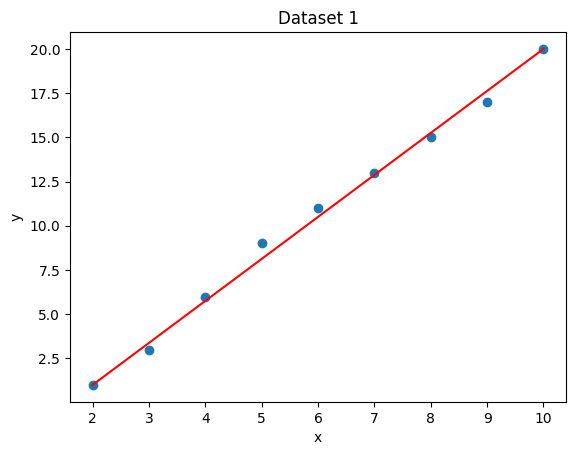

In [ ]:
plt.scatter(x, y)
plt.title('Dataset 1')
plt.xlabel('x')
plt.ylabel('y')
plt.plot([min(x), max(x)], [min(y), max(y)], color = 'red')
plt.show()

FINDING THE VALUE OF B1

In [ ]:
n = len(x)
xbar = x.mean()
ybar = y.mean()
numerator = 0
denominator = 0
for i in range(n):
  numerator += (x[i] - xbar) * (y[i] - ybar)
  denominator += (x[i] - xbar) ** 2

b1 = numerator/denominator
print("The value of b1 is : ", b1)

The value of b1 is :  2.3333333333333335


FINDING THE VALUE OF B0

In [ ]:
b0 = (sum(y) - (b1 * sum(x))) / n
print("The value of b0 is: ", b0)

The value of b0 is:  -3.444444444444446


PRINTING THE EQUATION

In [ ]:
print("The equation for linear regression is: ")
print(f"y = {round(b0, 2)} + {round(b1, 2)}x")

The equation for linear regression is: 
y = -3.44 + 2.33x


In [ ]:
x_test = float(input("Enter the value of x: "))
y_test = b0 + b1 * x_test
print("The value of predicted y is: ", y_test)

Enter the value of x: 6
The value of predicted y is:  10.555555555555554


MSE and RMSE

In [ ]:
value = 0
for i in range(n):
  value += (y[i] - (b0 + b1 * x[i])) ** 2
mse = value/n
print("The value of MSE is: ", mse)

rmse = mse ** 0.5
print("The value of RMSE is: ", rmse)

The value of MSE is:  0.1728395061728393
The value of RMSE is:  0.41573970964154877


GRADIENT DESCENT

In [ ]:
df2 = pd.read_csv('salary_data.csv')
x2 = df2.iloc[:,0].values
y2 = df2.iloc[:,1].values

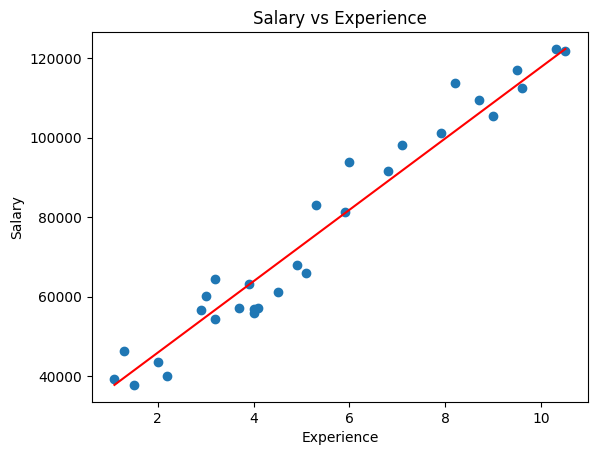

In [ ]:
plt.scatter(x2, y2)
plt.title('Salary vs Experience')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.plot([min(x2), max(x2)], [min(y2), max(y2)], color = 'red')
plt.show()

The cost after 0 epochs: 21676517569.11
The cost after 1000 epochs: 128641852.62
The cost after 2000 epochs: 105687860.53
The cost after 3000 epochs: 104322815.95
The cost after 4000 epochs: 104241638.5
The cost after 5000 epochs: 104236810.98
The cost after 6000 epochs: 104236523.89
The cost after 7000 epochs: 104236506.82
The cost after 8000 epochs: 104236505.81
The cost after 9000 epochs: 104236505.74
The value of m is:  9449.96495544505
The value of c is:  25792.182448909367


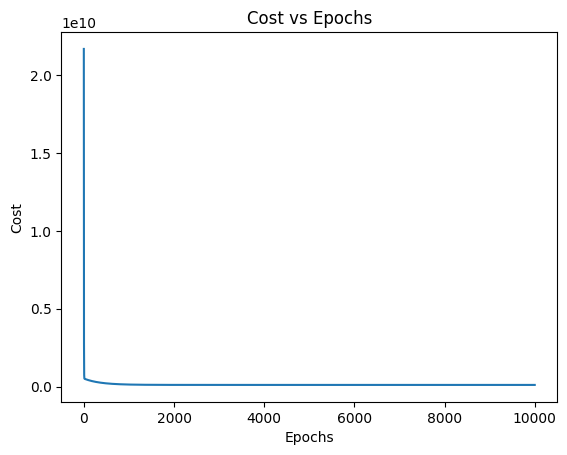

In [ ]:
m = 0
c = 0
L = 0.001
epochs = 10000
costs = []
y_pred = []
error = []
for i in range(epochs):
  y_pred = m*x2 + c
  d_m = (-2/n) * sum(x2 * (y2 - y_pred))
  d_c = (-2/n) * sum(y2 - y_pred)
  m = m - L * d_m
  c = c - L * d_c
  cost = (1/n) * sum((y2 - y_pred) ** 2)
  costs.append(cost)
  if i%1000 == 0:
    print(f"The cost after {i} epochs: {round(cost, 2)}")
print("The value of m is: ", m)
print("The value of c is: ", c)
plt.plot(range(epochs), costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost vs Epochs')
plt.show()

In [ ]:
print("The equation of line is:")
print(f"y = {round(c, 2)} + {round(m, 2)}x")

The equation of line is:
y = 25792.18 + 9449.96x


In [ ]:
x_test_1 = float(input("Enter the number of experience years: "))
y_test_1 = c + m * x_test_1
print("The salary for the given experience is: ", y_test_1)


Enter the number of experience years: 8
The salary for the given experience is:  101391.90209246977


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error
regressor = LinearRegression()
x_train = x2.reshape(-1, 1)
y_train = y2.reshape(-1, 1)
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
x_test_2 = float(input("Enter the number of experience years: "))
y_test_2 = regressor.predict([[x_test_2]])
print("The salary for the given experience is: ", y_test_2)

Enter the number of experience years: 9
The salary for the given experience is:  [[110841.86109176]]


In [ ]:
print("The coefficients of the model are: ")
print(f"m = {round(regressor.coef_[0][0], 2)}")
print(f"c = {round(regressor.intercept_[0], 2)}")

The coefficients of the model are: 
m = 9449.96
c = 25792.2


In [ ]:
print(f"MSE: {mean_squared_error(y_train, regressor.predict(x_train))}")
print(f"RMSE: {root_mean_squared_error(y_train, regressor.predict(x_train))}")

MSE: 31270951.722280964
RMSE: 5592.043608760661
